# Working with Data

In [1]:
from typing import List, Dict
from collections import Counter
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
point = 52
bucket_size = 20
a = point/bucket_size
b = math.floor(a)
c = bucket_size * b
print(a, b, c)

2.6 2 40


In [13]:
def bucketize(point: float, bucket_size: float) -> float:
    '''Floor the point to the next lower multiple of bucket_size'''
    return bucket_size * math.floor(point/bucket_size)

In [22]:
def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    return plt

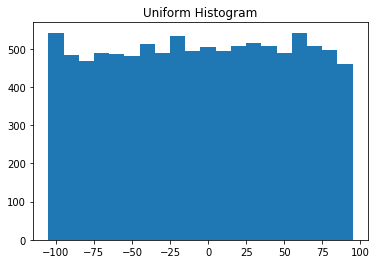

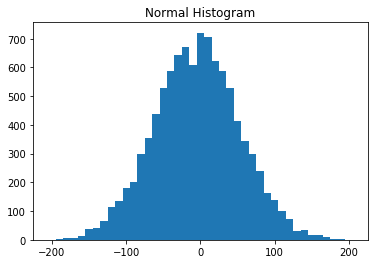

In [25]:
import random
from scratch.probability import inverse_normal_cdf

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
          for _ in range(10000)]

plt = plot_histogram(uniform, 10, "Uniform Histogram")
plt.savefig('images/working_histogram_uniform.png')
plt.show();

plt = plot_histogram(normal, 10, "Normal Histogram")
plt.savefig('images/working_histogram_normal.png')
plt.savefig('images/working_histogram_uniform.png')
plt.show();

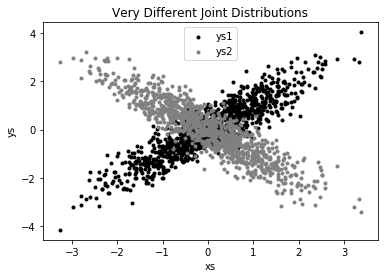

In [31]:
import random
from scratch.probability import inverse_normal_cdf

def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.savefig('images/working_scatter.png')
plt.show();

In [32]:
from scratch.statistics import correlation

print(correlation(xs, ys1))      # about 0.9
print(correlation(xs, ys2))      # about -0.9

0.8991516606270032
-0.90185212369414


In [33]:
from scratch.linear_algebra import Matrix, Vector, make_matrix

def correlation_matrix(data: List[Vector]) -> Matrix:
    """
    Returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]
    """
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])

    return make_matrix(len(data), len(data), correlation_ij)

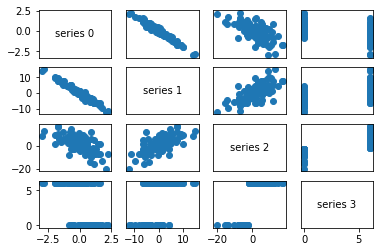

In [37]:
from typing import List

# Just some random data to show off correlation scatterplots
num_points = 100

def random_row() -> List[float]:
   row = [0.0, 0, 0, 0]
   row[0] = random_normal()
   row[1] = -5 * row[0] + random_normal()
   row[2] = row[0] + row[1] + 5 * random_normal()
   row[3] = 6 if row[2] > -2 else 0
   return row

random.seed(0)
# each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]

corr_data = [list(col) for col in zip(*corr_rows)]

# corr_data is a list of four 100-d vectors
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):

        # Scatter column_j on the x-axis vs column_i on the y-axis,
        if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])

        # unless i == j, in which case show the series name.
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                xycoords='axes fraction',
                                ha="center", va="center")

        # Then hide axis labels except left and bottom charts
        if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

# Fix the bottom right and top left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.savefig('images/working_scatterplot_matrix.png')
plt.show();

In [38]:
import datetime

stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}

In [39]:
# oops, typo
stock_price['cosing_price'] = 103.06

prices: Dict[datetime.date, float] = {}

from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

In [40]:
from dateutil.parser import parse

def parse_row(row: List[str]) -> StockPrice:
    symbol, date, closing_price = row
    return StockPrice(symbol=symbol,
                      date=parse(date).date(),
                      closing_price=float(closing_price))

# Now test our function
stock = parse_row(["MSFT", "2018-12-14", "106.03"])

assert stock.symbol == "MSFT"
assert stock.date == datetime.date(2018, 12, 14)
assert stock.closing_price == 106.03

In [41]:
from scratch.linear_algebra import distance

a_to_b = distance([63, 150], [67, 160])        # 10.77
a_to_c = distance([63, 150], [70, 171])        # 22.14
b_to_c = distance([67, 160], [70, 171])        # 11.40

a_to_b = distance([160, 150], [170.2, 160])    # 14.28
a_to_c = distance([160, 150], [177.8, 171])    # 27.53
b_to_c = distance([170.2, 160], [177.8, 171])  # 13.37

## Rescaling

In [45]:
from typing import Tuple

from scratch.linear_algebra import vector_mean
from scratch.statistics import standard_deviation

In [56]:
vectors = [[-3, -1, 1, 4], [-1, 0, 1, 1], [1, 1, 1, 0]]

In [57]:
dim = len(vectors[0])
dim

4

In [59]:
means = vector_mean(vectors)
means

[-1.0, 0.0, 1.0, 1.6666666666666665]

In [62]:
# vector mean = scalar_multiply(1/n, vector_sum(vectors))
(-3-1+1)/3

-1.0

In [69]:
v0 = [vector[0] for vector in vectors]
v0

[-3, -1, 1]

In [67]:
standard_deviation([vector[0] for vector in vectors])         

2.0

In [73]:
mean = -1
std = math.sqrt(((-3+1)**2 + (-1+1)**2 + (1+1)**2) / (len(v0) - 1))
std

2.0

In [42]:
def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the means and standard deviations for each position"""
    dim = len(data[0])

    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]

    return means, stdevs

vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
assert means == [-1, 0, 1]
assert stdevs == [2, 1, 0]

In [75]:
vectors = [[-3, -1, 1, 4], [-1, 0, 1, 1], [1, 1, 1, 0]]
dim = len(vectors[0])
dim

4

In [77]:
means, stdevs = scale(vectors)
means, stdevs

([-1.0, 0.0, 1.0, 1.6666666666666665], [2.0, 1.0, 0.0, 2.0816659994661326])

In [81]:
# "standard deviations from the mean"
(vectors[0][0] - means[0]) / stdevs[0]

-1.0

In [43]:
def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)

    # Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]

    return rescaled

means, stdevs = scale(rescale(vectors))
assert means == [0, 0, 1]
assert stdevs == [1, 1, 0]

In [44]:
print(rescale(vectors))

[[-1.0, -1.0, 1], [0.0, 0.0, 1], [1.0, 1.0, 1]]


## tqdm

In [82]:
#! pip install tqdm

In [84]:
import tqdm
for i in tqdm.tqdm(range(100)):
    # do something slow
    _ = [random.random() for _ in range(1000000)]

100%|██████████| 100/100 [00:11<00:00,  8.26it/s]


In [89]:
from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]
    
    with tqdm.trange(3, n) as t:
        for i in t:
            # i is prime if no smaller prime divides it
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)
            t.set_description(f"{len(primes)} primes")
    return primes

my_primes = primes_up_to(10000)

518 primes:  36%|███▋      | 3626/9997 [00:03<00:05, 1071.02it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

938 primes:  73%|███████▎  | 7281/9997 [00:07<00:02, 1036.74it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

1229 primes: 100%|██████████| 9997/9997 [00:09<00:00, 1000.35it/s]


In [87]:
my_primes

[2,
 3,
 5,
 7,
 11,
 13,
 17,
 19,
 23,
 29,
 31,
 37,
 41,
 43,
 47,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]